# Classification and prediction of ASD  
<br>

## Models with the SRS/RBSR dataset

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
ASD_df2 = pd.read_csv('ASD_df2.csv')

In [3]:
ASD_df2.head()

,DX_GROUP,SEX,FIQ,SRS_INFORMANT,SRS_TOTAL_RAW,SRS_AWARENESS_RAW,SRS_COGNITION_RAW,SRS_COMMUNICATION_RAW,SRS_MOTIVATION_RAW,SRS_MANNERISMS_RAW,...,SRS_MOTIVATION_T,SRS_MANNERISMS_T,RBSR_6SUBSCALE_STEREOTYPED,RBSR_6SUBSCALE_SELF-INJURIOUS,RBSR_6SUBSCALE_COMPULSIVE,RBSR_6SUBSCALE_RITUALISTIC,RBSR_6SUBSCALE_SAMENESS,RBSR_6SUBSCALE_RESTRICTED,RBSR_6SUBSCALE_TOTAL,AGE
0,1,1,110.0,5.0,82.0,7.0,14.0,31.0,11.0,19.0,...,56.0,72.0,1.0,0.0,2.0,1.0,5.0,3.0,12.0,41.0
1,1,1,117.0,5.0,60.0,6.0,7.0,26.0,12.0,9.0,...,57.0,55.0,1.0,0.0,5.0,3.0,2.0,4.0,15.0,59.0
2,1,1,114.0,5.0,58.0,3.0,14.0,18.0,15.0,8.0,...,62.0,53.0,1.0,0.0,4.0,3.0,4.0,1.0,13.0,57.0
3,1,1,109.0,5.0,146.0,19.0,26.0,50.0,23.0,28.0,...,76.0,87.0,7.0,0.0,0.0,3.0,3.0,7.0,20.0,45.0
4,1,1,114.0,5.0,138.0,15.0,27.0,43.0,27.0,26.0,...,82.0,83.0,1.0,0.0,11.0,10.0,16.0,6.0,44.0,62.0


In [4]:
ASD_df2.shape

(358, 24)

---
# Summary 


1. Split the dataset into Train/Test
2. Explore the dataset with PCA dimensionnality reduction 
3. Create a Baseline to evaluate my models 
4. Models with GridSearchCV
    * 1. Decision tree
    * 2. Random forest
    * 3. kNN
    * 4. SVC
5. Dataframe with models and conclusion
---

In [5]:
ASD_df2.info() # Looks good !!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 24 columns):
DX_GROUP                         358 non-null int64
SEX                              358 non-null int64
FIQ                              358 non-null float64
SRS_INFORMANT                    358 non-null float64
SRS_TOTAL_RAW                    358 non-null float64
SRS_AWARENESS_RAW                358 non-null float64
SRS_COGNITION_RAW                358 non-null float64
SRS_COMMUNICATION_RAW            358 non-null float64
SRS_MOTIVATION_RAW               358 non-null float64
SRS_MANNERISMS_RAW               358 non-null float64
SRS_TOTAL_T                      358 non-null float64
SRS_AWARENESS_T                  358 non-null float64
SRS_COGNITION_T                  358 non-null float64
SRS_COMMUNICATION_T              358 non-null float64
SRS_MOTIVATION_T                 358 non-null float64
SRS_MANNERISMS_T                 358 non-null float64
RBSR_6SUBSCALE_STEREOTYPED       35

## 1. Train/Test split

In [6]:
from sklearn.model_selection import train_test_split

# Create X and y arrays for my analysis
X = ASD_df2.drop(['DX_GROUP'], axis=1).values
y = ASD_df2.DX_GROUP.values

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.20, random_state=14)

print('X train:', X_tr.shape)
print('X test:', X_te.shape)
print('y train:', y_tr.shape)
print('y test:', y_te.shape)

print('ASD in the test data:', (y_te == 1).sum())
print('Control in the test data:', (y_te == 2).sum())

X train: (286, 23)
X test: (72, 23)
y train: (286,)
y test: (72,)
ASD in the test data: 33
Control in the test data: 39


In [7]:
# Check the age of the target to be sure that not all the control are old 

print('Age of train control: {:.2f}'.format(X_tr[(y_tr == 2), -1].mean())) # Mean age of control
print('Age of train asd: {:.2f}'.format(X_tr[(y_tr == 1), -1].mean())) # Mean age of asd

print('Age of test control: {:.2f}'.format(X_te[(y_te == 2), -1].mean())) # Mean age of control
print('Age of test asd: {:.2f}'.format(X_te[(y_te == 1), -1].mean())) # Mean age of asd

Age of train control: 10.97
Age of train asd: 13.63
Age of test control: 10.98
Age of test asd: 17.33


In [8]:
# Check the sex of the target to be sure not all the control are one of both 
# 1 = male, 2 = female

print('Male and ASD: {:.2f}'.format(((((X_tr[:,0]==1) & (y_tr == 1)).sum())/len(X_tr))))
print('Male and Control: {:.2f}'.format(((((X_tr[:,0]==1) & (y_tr == 2)).sum())/len(X_tr))))
print('Female and ASD: {:.2f}'.format(((((X_tr[:,0]==2) & (y_tr == 1)).sum())/len(X_tr))))
print('Female and Control: {:.2f}'.format(((((X_tr[:,0]==2) & (y_tr == 2)).sum())/len(X_tr))))

print()
print('---- TEST SET ----')
print('Male and ASD: {:.2f}'.format(((((X_te[:,0]==1) & (y_te == 1)).sum())/len(X_te))))
print('Male and control: {:.2f}'.format(((((X_te[:,0]==1) & (y_te == 2)).sum())/len(X_te))))
print('Female and ASD: {:.2f}'.format(((((X_te[:,0]==2) & (y_te == 1)).sum())/len(X_te))))
print('Female and control: {:.2f}'.format(((((X_te[:,0]==2) & (y_te == 2)).sum())/len(X_te))))

Male and ASD: 0.40
Male and Control: 0.35
Female and ASD: 0.08
Female and Control: 0.16

---- TEST SET ----
Male and ASD: 0.40
Male and control: 0.42
Female and ASD: 0.06
Female and control: 0.12


## 2. PCA plotting of my dataset

In [9]:
from sklearn.preprocessing import StandardScaler

# Transform X_tr
scaler = StandardScaler()
X_tr_rescaled = scaler.fit_transform(X_tr, y_tr)

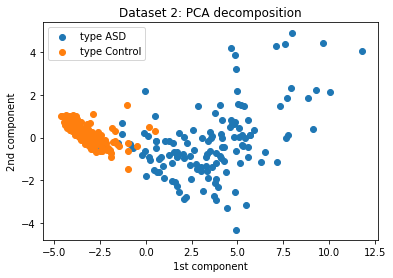

In [10]:
from sklearn.decomposition import PCA

# Create PCA transformer
pca = PCA(n_components=2)

X_2d = pca.fit_transform(X_tr_rescaled);


for groups in [1, 2]:
    idx = (y_tr == groups)
    
    if groups == 1:
        groups = 'ASD'
    if groups == 2:
        groups = 'Control'

    # Plot their components
    plt.scatter(
        X_2d[idx, 0], X_2d[idx, 1],
        label='type {}'.format(groups)
    )

# Labels and legend
plt.legend()
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.title('Dataset 2: PCA decomposition')
plt.show()

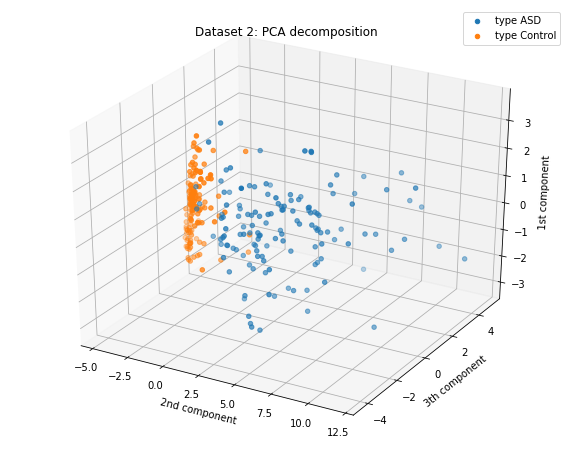

In [11]:
from mpl_toolkits.mplot3d import axes3d
from sklearn.decomposition import PCA

# Create PCA transformer
pca = PCA(n_components=3)

X_3d = pca.fit_transform(X_tr_rescaled);

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')

# Data for a three-dimensional line

for groups in [1, 2]:
    
    idx = (y_tr == groups)
    
    if groups == 1:
        groups = 'ASD'
    if groups == 2:
        groups = 'Control'
    
    ax.scatter3D(
        X_3d[idx, 0], X_3d[idx, 1], X_3d[idx, 2],
        label='type {}'.format(groups), marker='o'
    )
    
plt.legend()
ax.set_zlabel('1st component')
ax.set_xlabel('2nd component')
ax.set_ylabel('3th component')
plt.title('Dataset 2: PCA decomposition')

plt.show()

In [12]:
# Try to see how much component we need with PCA

# Create PCA transformer
pca = PCA(n_components=None)

# Apply PCA to rescaled data
X_pca_rescaled = pca.fit_transform(X_tr_rescaled)

# Proportion of variance explained
pca.explained_variance_ratio_;

In [13]:
pve = pca.explained_variance_ratio_

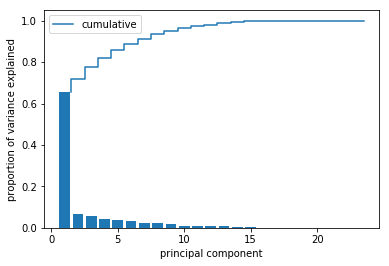

In [14]:
# Create bar plot
xcor = np.arange(1, len(pve) + 1) # 1,2,..,n_components
plt.bar(xcor, pve)

# Add cumulative sum
pve_cumsum = np.cumsum(pve)
plt.step(
    xcor+0.5, # 1.5,2.5,..,n_components+0.5
    pve_cumsum, # Cumulative sum
    label='cumulative'
)

# Add labels
plt.xlabel('principal component')
plt.ylabel('proportion of variance explained')
plt.legend()
plt.show()

In [15]:
## Number of pca is the dataset to run with grid

n = len(X_tr[0])

list_pca = list(range(2,n))
list_pca.insert(0,None)

# Create a dict to store the results of my models
models_acc = dict()

## 3. Create a Baseline to evaluate my models

Since we are working here with a binary classification model I will use the 'most frequent' baseline.

In [16]:
from sklearn.dummy import DummyClassifier

# Create the dummy classifier
dummy = DummyClassifier(strategy='most_frequent')

# Fit it
dummy.fit(None, y_tr)

# Compute test accuracy
baseline_accuracy = dummy.score(None, y_te)
print('Test accuracy baseline: {:.2f}%'.format(100*baseline_accuracy))
models_acc['baseline'] = 100*baseline_accuracy

Test accuracy baseline: 54.17%


In [17]:
# Function to plot my confusion matrix
# code taken at https://www.kaggle.com/grfiv4/plot-a-confusion-matrix

import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

---
---

# 4. Models 
<br>
<br>

## A. Decision tree:

I will try to fit and plot a first decision tree since they are the most easy models to read. <br>
I will then implement a GridSearchCV to tune the parameters of the Decision tree.

0.9722222222222222


C:\Users\xavier\anaconda3\envs\exts-ml\lib\site-packages\sklearn\preprocessing\data.py:765: DeprecationWarning: The parameter y on transform() is deprecated since 0.19 and will be removed in 0.21
  DeprecationWarning)


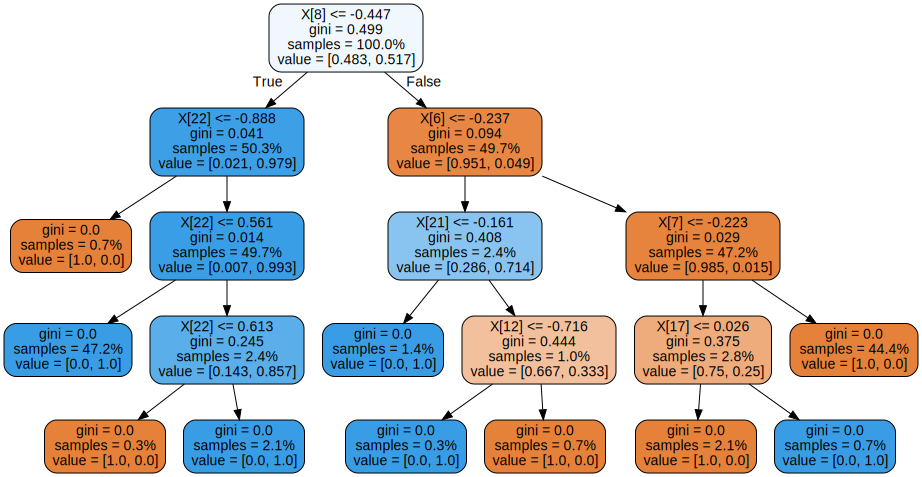

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.tree import export_graphviz
import graphviz

scaler = StandardScaler()

# Transform X_tr
X_tr_rescaled = scaler.fit_transform(X_tr, y_tr)

# Create dt and fit it to tr
dt = DecisionTreeClassifier(criterion='gini', max_depth=None)
dt.fit(X_tr_rescaled, y_tr)

# scale te
X_te_rescaled = scaler.transform(X_te, y_te)
# look at the score 
print(dt.score(X_te_rescaled, y_te))

# export decision tree
dot_data = export_graphviz(dt, out_file=None, filled=True,
                          rounded=True, proportion=True)


# Display decision tree
graphviz.Source(dot_data)

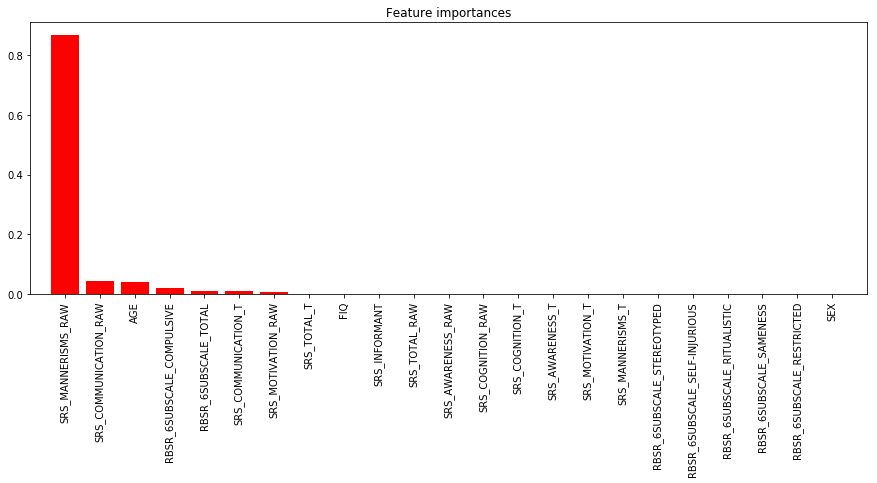

In [19]:
# look at the features importance  

features = dt.feature_importances_
indices = np.argsort(features)[::-1]

names = ASD_df2.drop(['DX_GROUP'], axis=1).copy()
names_ind = names.columns[indices]
names_ind

# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(15,5))
plt.title("Feature importances")
plt.bar(range(X_tr.shape[1]), features[indices],
        color="r", align="center")
plt.xticks(range(X_tr.shape[1]), names_ind, rotation='vertical')
plt.xlim([-1, X_tr.shape[1]])
plt.show()

## Decision tree model with GridsearchCV

Parameters:
* Scaler : None/scaler
* PCA reduction : n components
* tree : max depth ?

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dt = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('dt', DecisionTreeClassifier(criterion='gini',
                                    random_state=0))
])


param_grid={
    'scaler':[None, StandardScaler()],
    'pca__n_components':list_pca,
    'dt__max_depth':np.arange(1,30),
}

dt_gdcv = GridSearchCV(dt, param_grid, cv=5, n_jobs=-1, verbose=1, return_train_score=True)

dt_gdcv.fit(X_tr, y_tr);

dt_results = pd.DataFrame({
    'scaler':dt_gdcv.cv_results_['param_scaler'],
    'PCA': dt_gdcv.cv_results_['param_pca__n_components'],
    'tree_depth':dt_gdcv.cv_results_['param_dt__max_depth'],
    'mean_tr': dt_gdcv.cv_results_['mean_train_score'],
    'mean_te': dt_gdcv.cv_results_['mean_test_score'],
    'std_te': dt_gdcv.cv_results_['std_test_score']
})

dt_results.sort_values(by='mean_te', ascending=False).head(10)

Fitting 5 folds for each of 1276 candidates, totalling 6380 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 1655 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 5655 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 6380 out of 6380 | elapsed:   15.9s finished
C:\Users\xavier\anaconda3\envs\exts-ml\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


,scaler,PCA,tree_depth,mean_tr,mean_te,std_te
180,None,3,5,0.995629,0.965035,0.015119
93,"StandardScaler(copy=True, with_mean=True, with...",3,3,0.979908,0.965035,0.024252
91,"StandardScaler(copy=True, with_mean=True, with...",2,3,0.979039,0.965035,0.024252
933,"StandardScaler(copy=True, with_mean=True, with...",5,22,1.000000,0.961538,0.022775
135,"StandardScaler(copy=True, with_mean=True, with...",2,4,0.990397,0.961538,0.022775
669,"StandardScaler(copy=True, with_mean=True, with...",5,16,1.000000,0.961538,0.022775
35,"StandardScaler(copy=True, with_mean=True, with...",18,1,0.969420,0.961538,0.019845
1109,"StandardScaler(copy=True, with_mean=True, with...",5,26,1.000000,0.961538,0.022775
37,"StandardScaler(copy=True, with_mean=True, with...",19,1,0.969420,0.961538,0.019845
39,"StandardScaler(copy=True, with_mean=True, with...",20,1,0.969420,0.961538,0.019845


#### Classification report :
* PRECISION : How many times are we correct when we predict positive?
* RECALL : How many times do we predict positive when it is?
* F1 SCORE : The F1 score is a way to combine the precision and recall metrics into a single score.

Test accuracy decision tree model: 97.22%
              precision    recall  f1-score   support

           1       1.00      0.94      0.97        33
           2       0.95      1.00      0.97        39

   micro avg       0.97      0.97      0.97        72
   macro avg       0.98      0.97      0.97        72
weighted avg       0.97      0.97      0.97        72



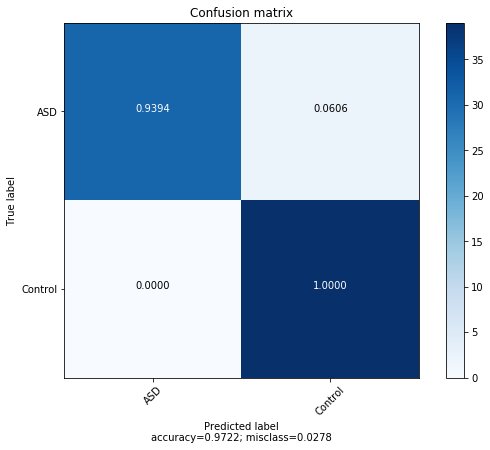

In [21]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('Test accuracy decision tree model: {:.2f}%'.format(100*dt_gdcv.score(X_te, y_te)))
models_acc['Decision tree'] = 100*dt_gdcv.score(X_te, y_te)

y_pred = dt_gdcv.predict(X_te)

report = classification_report(y_true=y_te, y_pred=y_pred)
print(report)

# Confusion matrix
matrix = confusion_matrix(y_true=y_te, y_pred=y_pred)

plot_confusion_matrix(matrix, ['ASD', 'Control'])

---

## B. Random forest model with GridsearchCV

First I am gonne plot the feature importance with a random forest model without gridsearch. <br>
Then I will implement a gridsearch and tune the different parameters 

Parameters:
* Scaler : None/scaler
* PCA reduction : n components
* n_estimators : number of trees

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  51 out of  51 | elapsed:    0.0s finished


Test accuracy random forest model: 97.22%



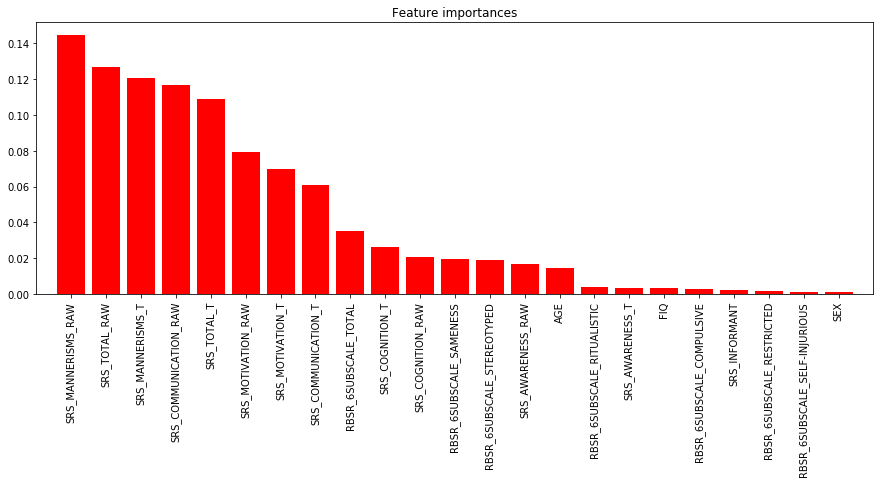

In [22]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_jobs=-1,
                                  verbose=1,
                                  random_state=9,
                               n_estimators=51)

forest.fit(X_tr, y_tr)


print('Test accuracy random forest model: {:.2f}%'.format(100*forest.score(X_te, y_te)))
print()

# Plot the most important features 

features = forest.feature_importances_
indices = np.argsort(features)[::-1]

names = ASD_df2.drop(['DX_GROUP'], axis=1).copy()
names_ind = names.columns[indices]
names_ind

# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(15,5))
plt.title("Feature importances")
plt.bar(range(X_tr.shape[1]), features[indices],
        color="r", align="center")
plt.xticks(range(X_tr.shape[1]), names_ind, rotation='vertical')
plt.xlim([-1, X_tr.shape[1]])
plt.show()

In [23]:
# Grid Search CV

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

random_f = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('rf', RandomForestClassifier(n_jobs=-1,
                                  verbose=1,
                                  random_state=9
    ))
])

param_grid={
    'scaler':[None, StandardScaler()],
    'pca__n_components':list_pca,
    'rf__n_estimators':np.arange(1,501, 50),
}

rf_gdcv = GridSearchCV(random_f, param_grid, cv=5, n_jobs=-1, verbose=2, return_train_score=True)

rf_gdcv.fit(X_tr, y_tr);

rf_results = pd.DataFrame({
    'scaler':rf_gdcv.cv_results_['param_scaler'],
    'PCA': rf_gdcv.cv_results_['param_pca__n_components'],
    'trees': rf_gdcv.cv_results_['param_rf__n_estimators'],
    'mean_tr': rf_gdcv.cv_results_['mean_train_score'],
    'mean_te': rf_gdcv.cv_results_['mean_test_score'],
    'std_te': rf_gdcv.cv_results_['std_test_score']
})

rf_results.sort_values(by='mean_te', ascending=False).head(10)

Fitting 5 folds for each of 440 candidates, totalling 2200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 175 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done 378 tasks      | elapsed:   59.8s
[Parallel(n_jobs=-1)]: Done 661 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1026 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1471 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1998 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 2200 out of 2200 | elapsed:  6.3min finished
C:\Users\xavier\anaconda3\envs\exts-ml\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=

,scaler,PCA,trees,mean_tr,mean_te,std_te
123,"StandardScaler(copy=True, with_mean=True, with...",7,51,1.0,0.961538,0.019845
139,"StandardScaler(copy=True, with_mean=True, with...",7,451,1.0,0.961538,0.019845
163,"StandardScaler(copy=True, with_mean=True, with...",9,51,1.0,0.961538,0.016725
223,"StandardScaler(copy=True, with_mean=True, with...",12,51,1.0,0.961538,0.016725
137,"StandardScaler(copy=True, with_mean=True, with...",7,401,1.0,0.961538,0.019845
251,"StandardScaler(copy=True, with_mean=True, with...",13,251,1.0,0.961538,0.012616
135,"StandardScaler(copy=True, with_mean=True, with...",7,351,1.0,0.961538,0.019845
173,"StandardScaler(copy=True, with_mean=True, with...",9,301,1.0,0.961538,0.016725
179,"StandardScaler(copy=True, with_mean=True, with...",9,451,1.0,0.961538,0.016725
245,"StandardScaler(copy=True, with_mean=True, with...",13,101,1.0,0.961538,0.012616


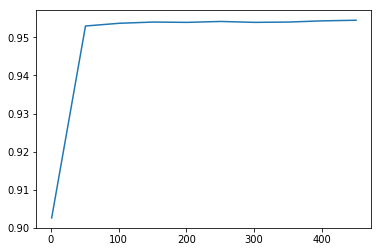

In [24]:
plot_data = rf_results.groupby('trees').mean()

plt.plot(plot_data.index, plot_data['mean_te'])
plt.show()

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  51 out of  51 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  51 out of  51 | elapsed:    0.0s finished



Test accuracy random forest model: 97.22%

              precision    recall  f1-score   support

           1       1.00      0.94      0.97        33
           2       0.95      1.00      0.97        39

   micro avg       0.97      0.97      0.97        72
   macro avg       0.98      0.97      0.97        72
weighted avg       0.97      0.97      0.97        72



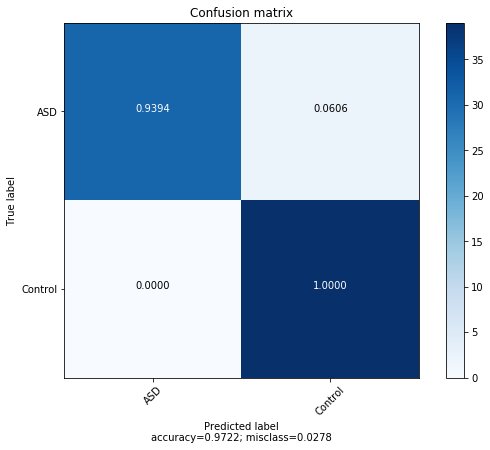

In [25]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print()
print('Test accuracy random forest model: {:.2f}%'.format(100*rf_gdcv.score(X_te, y_te)))
print()
y_pred = rf_gdcv.predict(X_te)

report = classification_report(y_true=y_te, y_pred=y_pred)
print(report)

# Confusion matrix
matrix = confusion_matrix(y_true=y_te, y_pred=y_pred)

plot_confusion_matrix(matrix, ['ASD', 'Control'])

#### Refine search for the number of estimators 

In [26]:
print('Best score:', rf_gdcv.best_score_)
print('Best estimator:', rf_gdcv.best_estimator_)
print('Best params:', rf_gdcv.best_params_)

Best score: 0.9615384615384616
Best estimator: Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            m...stimators=51, n_jobs=-1,
            oob_score=False, random_state=9, verbose=1, warm_start=False))])
Best params: {'pca__n_components': 7, 'rf__n_estimators': 51, 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

random_f_ref = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=7)),
    ('rf', RandomForestClassifier(n_jobs=-1,
                                  verbose=1,
                                  random_state=9
    ))
])

grid_refined={
#     'scaler':[None, StandardScaler()],
#     'pca__n_components':list_pca,
    'rf__n_estimators':np.arange(1,52)
}

rf_gdcv_refined = GridSearchCV(random_f_ref, grid_refined, cv=5, n_jobs=-1, verbose=2, return_train_score=True)

rf_gdcv_refined.fit(X_tr, y_tr);

rf_results_ref = pd.DataFrame({
#     'scaler':rf_gdcv_refined.cv_results_['param_scaler'],
#     'PCA': rf_gdcv_refined.cv_results_['param_pca__n_components'],
    'trees': rf_gdcv_refined.cv_results_['param_rf__n_estimators'],
    'mean_tr': rf_gdcv_refined.cv_results_['mean_train_score'],
    'mean_te': rf_gdcv_refined.cv_results_['mean_test_score'],
    'std_te': rf_gdcv_refined.cv_results_['std_test_score']
})

rf_results_ref.sort_values(by='mean_te', ascending=False).head(10)

Fitting 5 folds for each of 51 candidates, totalling 255 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 240 out of 255 | elapsed:   11.4s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 255 out of 255 | elapsed:   12.1s finished
C:\Users\xavier\anaconda3\envs\exts-ml\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.0s finished


,trees,mean_tr,mean_te,std_te
13,14,0.994737,0.968531,0.012627
24,25,0.999123,0.968531,0.012627
23,24,0.999123,0.968531,0.012627
22,23,0.999123,0.968531,0.012627
6,7,0.992990,0.968531,0.012627
20,21,0.996491,0.968531,0.012627
10,11,0.992998,0.968531,0.012627
11,12,0.993875,0.968531,0.012627
12,13,0.995614,0.968531,0.012627
14,15,0.997368,0.968531,0.012627



Test accuracy refined random forest model: 98.61%


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=7)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=7)]: Done   7 out of   7 | elapsed:    0.0s finished



              precision    recall  f1-score   support

           1       1.00      0.97      0.98        33
           2       0.97      1.00      0.99        39

   micro avg       0.99      0.99      0.99        72
   macro avg       0.99      0.98      0.99        72
weighted avg       0.99      0.99      0.99        72



[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=7)]: Done   7 out of   7 | elapsed:    0.0s finished


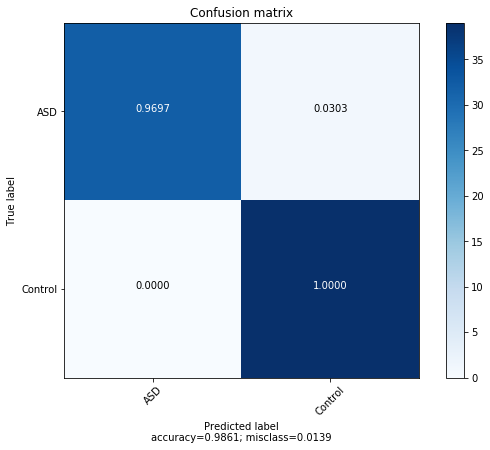

In [28]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print()
print('Test accuracy refined random forest model: {:.2f}%'.format(100*rf_gdcv_refined.score(X_te, y_te)))
models_acc['Random forest'] = 100*rf_gdcv_refined.score(X_te, y_te)
print()

y_pred = rf_gdcv_refined.predict(X_te)

report = classification_report(y_true=y_te, y_pred=y_pred)
print(report)

# Confusion matrix
matrix = confusion_matrix(y_true=y_te, y_pred=y_pred)

plot_confusion_matrix(matrix, ['ASD', 'Control'])

---

## C. kNN model with GridsearchCV

Parameters:
* Scaler : None/scaler
* PCA reduction : n components
* n_neighbors : Number of neighbors to use 
* weights : weight function used in prediction
* p : Power parameter for the Minkowski metric

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
# Pipeline with gridsearch of componenent and number of k Neighboors 

k_nn = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('knn', KNeighborsClassifier(n_jobs=-1
    ))
])

param_grid={
    'scaler':[None, StandardScaler()],
    'pca__n_components':list_pca,
    'knn__n_neighbors':np.arange(1,101, 10),
    'knn__weights':['uniform', 'distance'],
    'knn__p':[1, 2]
}

k_nn_gdcv = GridSearchCV(k_nn, param_grid, cv=5, n_jobs=-1, verbose=1, return_train_score=True)

k_nn_gdcv.fit(X_tr, y_tr);

knn_results = pd.DataFrame({
    'scaler':k_nn_gdcv.cv_results_['param_scaler'],
    'PCA': k_nn_gdcv.cv_results_['param_pca__n_components'],
    'k': k_nn_gdcv.cv_results_['param_knn__n_neighbors'],
    'p': k_nn_gdcv.cv_results_['param_knn__p'],
    'weights': k_nn_gdcv.cv_results_['param_knn__weights'],
    'mean_tr': k_nn_gdcv.cv_results_['mean_train_score'],
    'mean_te': k_nn_gdcv.cv_results_['mean_test_score'],
    'std_te': k_nn_gdcv.cv_results_['std_test_score']
})

knn_results.sort_values(by='mean_te', ascending=False).head(10)

Fitting 5 folds for each of 1760 candidates, totalling 8800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   38.3s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:   54.9s
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 8800 out of 8800 | elapsed:  4.5min finished
C:\Users\xavier\anaconda3\envs\exts-

,scaler,PCA,k,p,weights,mean_tr,mean_te,std_te
885,"StandardScaler(copy=True, with_mean=True, with...",3,51,1,uniform,0.966789,0.968531,0.025332
1105,"StandardScaler(copy=True, with_mean=True, with...",3,61,1,distance,1.000000,0.968531,0.025332
345,"StandardScaler(copy=True, with_mean=True, with...",19,11,2,distance,1.000000,0.965035,0.021673
331,"StandardScaler(copy=True, with_mean=True, with...",12,11,2,distance,1.000000,0.965035,0.021673
307,"StandardScaler(copy=True, with_mean=True, with...",22,11,2,uniform,0.967674,0.965035,0.021673
309,"StandardScaler(copy=True, with_mean=True, with...",None,11,2,distance,1.000000,0.965035,0.021673
319,"StandardScaler(copy=True, with_mean=True, with...",6,11,2,distance,1.000000,0.965035,0.021673
321,"StandardScaler(copy=True, with_mean=True, with...",7,11,2,distance,1.000000,0.965035,0.021673
323,"StandardScaler(copy=True, with_mean=True, with...",8,11,2,distance,1.000000,0.965035,0.021673
327,"StandardScaler(copy=True, with_mean=True, with...",10,11,2,distance,1.000000,0.965035,0.021673


Test accuracy: 97.22%

              precision    recall  f1-score   support

           1       1.00      0.94      0.97        33
           2       0.95      1.00      0.97        39

   micro avg       0.97      0.97      0.97        72
   macro avg       0.98      0.97      0.97        72
weighted avg       0.97      0.97      0.97        72



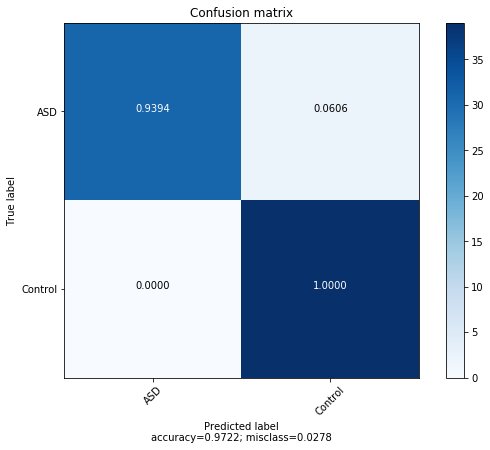

In [30]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('Test accuracy: {:.2f}%'.format(100*k_nn_gdcv.score(X_te, y_te)))
print()

y_pred = k_nn_gdcv.predict(X_te)

report = classification_report(y_true=y_te, y_pred=y_pred)
print(report)

# Confusion matrix
matrix = confusion_matrix(y_true=y_te, y_pred=y_pred)

plot_confusion_matrix(matrix, ['ASD', 'Control'])

### Refine the search 

In [31]:
print('Best score:', k_nn_gdcv.best_score_)
print('Best estimator:', k_nn_gdcv.best_estimator_)
print('Best params:', k_nn_gdcv.best_params_)

Best score: 0.9685314685314685
Best estimator: Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=51, p=1,
           weights='uniform'))])
Best params: {'knn__n_neighbors': 51, 'knn__p': 1, 'knn__weights': 'uniform', 'pca__n_components': 3, 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}


In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
# Pipeline with gridsearch of componenent and number of k Neighboors 

knn_2 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=3)),
    ('knn', KNeighborsClassifier(n_jobs=-1,
                                 p=1,
                                 weights='uniform'
    ))
])

grid_refine={
#     'scaler':[None, StandardScaler()],
#     'pca__n_components':list_pca,
    'knn__n_neighbors':np.arange(41,61),
#     'knn__weights':['uniform', 'distance'],
#     'knn__p':[1, 2]
}

k_nn_gdcv_ref = GridSearchCV(knn_2, grid_refine, cv=5, n_jobs=-1, verbose=1, return_train_score=True)

k_nn_gdcv_ref.fit(X_tr, y_tr);

knn_results_ref = pd.DataFrame({
#     'scaler':k_nn_gdcv.cv_results_['param_scaler'],
#     'PCA': k_nn_gdcv.cv_results_['param_pca__n_components'],
    'k': k_nn_gdcv_ref.cv_results_['param_knn__n_neighbors'],
#     'p': k_nn_gdcv.cv_results_['param_knn__p'],
#     'weights': k_nn_gdcv.cv_results_['param_knn__weights'],
    'mean_tr': k_nn_gdcv_ref.cv_results_['mean_train_score'],
    'mean_te': k_nn_gdcv_ref.cv_results_['mean_test_score'],
    'std_te': k_nn_gdcv_ref.cv_results_['std_test_score']
})

knn_results_ref.sort_values(by='mean_te', ascending=False).head(5)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.1s finished
C:\Users\xavier\anaconda3\envs\exts-ml\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


,k,mean_tr,mean_te,std_te
10,51,0.966789,0.968531,0.025332
4,45,0.966789,0.968531,0.025332
5,46,0.966789,0.968531,0.025332
6,47,0.967666,0.968531,0.025332
7,48,0.967666,0.968531,0.025332


Test accuracy: 97.22%

              precision    recall  f1-score   support

           1       1.00      0.94      0.97        33
           2       0.95      1.00      0.97        39

   micro avg       0.97      0.97      0.97        72
   macro avg       0.98      0.97      0.97        72
weighted avg       0.97      0.97      0.97        72



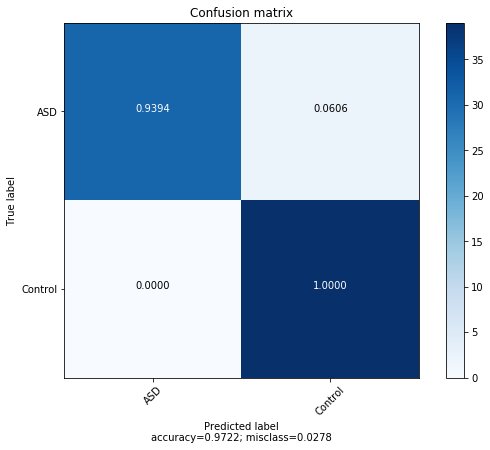

Best score: 0.9685314685314685
Best estimator: Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=45, p=1,
           weights='uniform'))])
Best params: {'knn__n_neighbors': 45}


In [33]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('Test accuracy: {:.2f}%'.format(100*k_nn_gdcv_ref.score(X_te, y_te)))
models_acc['kNN'] = 100*k_nn_gdcv_ref.score(X_te, y_te)
print()

y_pred = k_nn_gdcv_ref.predict(X_te)

report = classification_report(y_true=y_te, y_pred=y_pred)
print(report)

# Confusion matrix
matrix = confusion_matrix(y_true=y_te, y_pred=y_pred)

plot_confusion_matrix(matrix, ['ASD', 'Control'])

print('Best score:', k_nn_gdcv_ref.best_score_)
print('Best estimator:', k_nn_gdcv_ref.best_estimator_)
print('Best params:', k_nn_gdcv_ref.best_params_)

---

## D. SVC model with GridsearchCV

Parameters:
* Scaler : None/scaler
* PCA reduction : n components
* C : Regularization parameter
* kernel : Specifies the kernel type to be used in the algorithm

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

SVC = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('svc', SVC(random_state=9))
])


param_grid = {
    'scaler': [None, StandardScaler()],
    'pca__n_components':list_pca,
    'svc__C':[0.01, 0.1, 1, 10, 100],
    'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'svc__kernel':['rbf', 'linear'],
}

svc_gdcv = GridSearchCV(SVC, param_grid, cv=5, n_jobs=-1, verbose=1, return_train_score=True)

svc_gdcv.fit(X_tr, y_tr);

svc_results = pd.DataFrame({
    'scale': svc_gdcv.cv_results_['param_scaler'],
    'PCA': svc_gdcv.cv_results_['param_pca__n_components'],
    'kernel':svc_gdcv.cv_results_['param_svc__kernel'],
    'C': svc_gdcv.cv_results_['param_svc__C'],
    'gamma': svc_gdcv.cv_results_['param_svc__gamma'],
    'mean_tr': svc_gdcv.cv_results_['mean_train_score'],
    'mean_te': svc_gdcv.cv_results_['mean_test_score'],
    'std_te': svc_gdcv.cv_results_['std_test_score']
})

svc_results.sort_values(by='mean_te', ascending=False).head(5)

Fitting 5 folds for each of 2200 candidates, totalling 11000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 1284 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 2560 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 4504 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 6097 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 8345 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 11000 out of 11000 | elapsed:  4.7min finished
C:\Users\xavier\anaconda3\envs\exts-ml\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


,scale,PCA,kernel,C,gamma,mean_tr,mean_te,std_te
327,None,4,linear,1,0.001,0.971167,0.972028,0.013654
341,None,4,linear,100,1,0.970297,0.972028,0.013654
313,None,4,linear,0.1,0.1,0.970297,0.972028,0.013654
315,None,4,linear,0.1,0.01,0.970297,0.972028,0.013654
317,None,4,linear,0.1,0.001,0.970297,0.972028,0.013654


Test accuracy: 95.83%
              precision    recall  f1-score   support

           1       1.00      0.91      0.95        33
           2       0.93      1.00      0.96        39

   micro avg       0.96      0.96      0.96        72
   macro avg       0.96      0.95      0.96        72
weighted avg       0.96      0.96      0.96        72



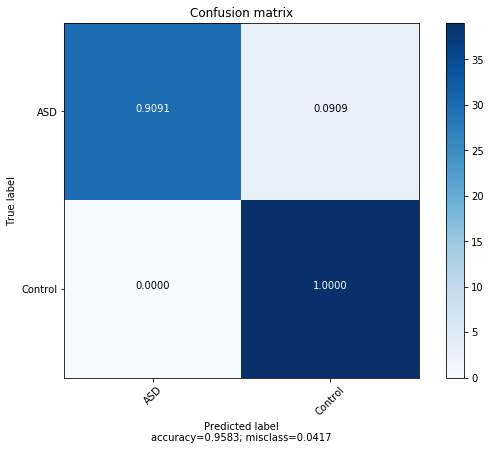

In [35]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('Test accuracy: {:.2f}%'.format(100*svc_gdcv.score(X_te, y_te)))

y_pred = svc_gdcv.predict(X_te)

report = classification_report(y_true=y_te, y_pred=y_pred)
print(report)

# Confusion matrix
matrix = confusion_matrix(y_true=y_te, y_pred=y_pred)

plot_confusion_matrix(matrix, ['ASD', 'Control'])

### Refine my search with C 

In [36]:
print('Best score:', svc_gdcv.best_score_)
print('Best estimator:', svc_gdcv.best_estimator_)
print('Best params:', svc_gdcv.best_params_)

Best score: 0.972027972027972
Best estimator: Pipeline(memory=None,
     steps=[('scaler', None), ('pca', PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('svc', SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=9, shrinking=True,
  tol=0.001, verbose=False))])
Best params: {'pca__n_components': 4, 'scaler': None, 'svc__C': 0.01, 'svc__gamma': 1, 'svc__kernel': 'linear'}


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:    1.6s finished
C:\Users\xavier\anaconda3\envs\exts-ml\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


       C  gamma   mean_tr   mean_te    std_te
45  0.02  5.556  0.971167  0.972028  0.013654
46  0.02  6.667  0.971167  0.972028  0.013654
66  0.07  6.667  0.971167  0.972028  0.013654
65  0.07  5.556  0.971167  0.972028  0.013654
64  0.07  4.445  0.971167  0.972028  0.013654

Best score: 0.972027972027972
Best estimator: Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('svc', SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=False, random_state=9, shrinking=True,
  tol=0.001, verbose=False))])
Best params: {'svc__C': 0.01, 'svc__gamma': 0.001}


Test accuracy: 95.83%

              precision    recall  f1-score   support

           1       1.00      0.91      0.95        33
           2       0.93      1.00      0.96        39

   micro avg       0.96      0.96      0

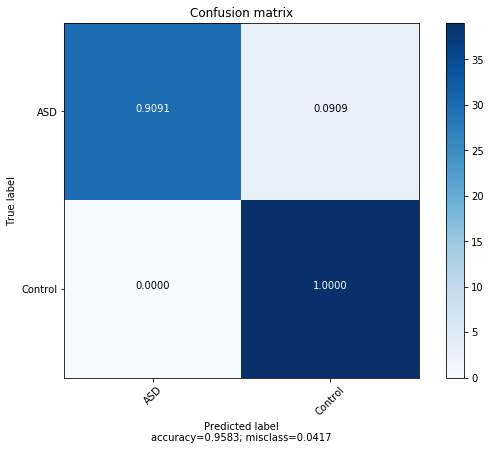

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
# Pipeline with gridsearch of components and number of k Neighboors 

SVC_ref = Pipeline([
#     ('scaler', StandardScaler()),
    ('pca', PCA(n_components=4)),
    ('svc', SVC(random_state=9,
               kernel='linear'))
])


grid_refined = {
#     'scaler': [None, StandardScaler()],
#     'pca__n_components':list_pca,
    'svc__C':[0.0001, 0.001, 0.005, 0.01, 0.02, 0.05, 0.07, 0.09, 0.1],
    'svc__gamma':np.linspace(0.001, 10, 10), # If 10 then gridsearch with above 
#     'svc__kernel':['rbf', 'linear'],
}

svc_gdcv_refined = GridSearchCV(SVC_ref, grid_refined, cv=5, n_jobs=-1, verbose=1, return_train_score=True)

svc_gdcv_refined.fit(X_tr, y_tr);

svc_results_refined = pd.DataFrame({
#     'scale': svc_gdcv.cv_results_['param_scaler'],
#     'PCA': svc_gdcv.cv_results_['param_pca__n_components'],
#     'kernel':svc_gdcv.cv_results_['param_svc__kernel'],
    'C': svc_gdcv_refined.cv_results_['param_svc__C'],
    'gamma': svc_gdcv_refined.cv_results_['param_svc__gamma'],
    'mean_tr': svc_gdcv_refined.cv_results_['mean_train_score'],
    'mean_te': svc_gdcv_refined.cv_results_['mean_test_score'],
    'std_te': svc_gdcv_refined.cv_results_['std_test_score']
})

print(svc_results_refined.sort_values(by='mean_te', ascending=False).head(5))
print()
print('Best score:', svc_gdcv_refined.best_score_)
print('Best estimator:', svc_gdcv_refined.best_estimator_)
print('Best params:', svc_gdcv_refined.best_params_)
print()

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print()
print('Test accuracy: {:.2f}%'.format(100*svc_gdcv_refined.score(X_te, y_te)))
models_acc['SVC'] = 100*svc_gdcv_refined.score(X_te, y_te)

y_pred = svc_gdcv_refined.predict(X_te)

print()
report = classification_report(y_true=y_te, y_pred=y_pred)
print(report)

# Confusion matrix
matrix = confusion_matrix(y_true=y_te, y_pred=y_pred)

plot_confusion_matrix(matrix, ['ASD', 'Control'])

<br>
<br>

--- 
--- 

# 5. Conclusion

In [38]:
models_df = pd.Series(models_acc).to_frame('Models')
models_df.sort_values('Models', ascending=False)

,Models
Random forest,98.611111
Decision tree,97.222222
kNN,97.222222
SVC,95.833333
baseline,54.166667


In [39]:
models_df.to_csv('df2_models.csv', index=False, encoding='utf-8')

[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=7)]: Done   7 out of   7 | elapsed:    0.0s finished


              precision    recall  f1-score   support

           1       1.00      0.97      0.98        33
           2       0.97      1.00      0.99        39

   micro avg       0.99      0.99      0.99        72
   macro avg       0.99      0.98      0.99        72
weighted avg       0.99      0.99      0.99        72



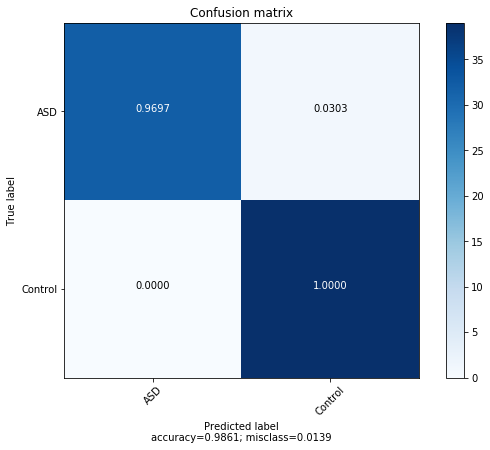

In [40]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = rf_gdcv_refined.predict(X_te)

report = classification_report(y_true=y_te, y_pred=y_pred)
print(report)

# Confusion matrix
matrix = confusion_matrix(y_true=y_te, y_pred=y_pred)

plot_confusion_matrix(matrix, ['ASD', 'Control'])

I correctly classify autism patients with an accuracy of 98.61% with the Random forest model. In this confusion matrix we can see that I never misclassify a child as autist if the true label is control but the mistakes the model is making is by misclassifing autist children as control. 

I am surprised by this level of accuracy since this dataset is the smallest of the 3 (with 358 rows). 

All models seems to performs slightly better than in the first dataset.